In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [18]:
df_user_specific, df_cross_user = pd.read_csv("user_dependent_pamap2.csv") , pd.read_csv("cross_user_BDLM.csv")

In [17]:
df_bdlm

,Subject,Accuracy,Macro Precision,Macro Recall
0,subject1,0.521918,0.539456,0.501595
1,subject2,0.544342,0.591736,0.539557
2,subject3,0.494499,0.580258,0.522712
3,subject4,0.535384,0.614543,0.518485
4,subject5,0.471300,0.477946,0.451329
5,subject6,0.464921,0.469769,0.435868
6,subject7,0.460408,0.458715,0.393779
7,subject8,0.468459,0.475239,0.440066


In [25]:
bachmarks = pd.read_csv("banchmarks.csv")
bachmarks

,model,means_precision,stds_precision,means_recall,stds_recall,means_accuracy,stds_accuracy
0,GaussianNB(),0.4962,0.0287,0.4721,0.0176,0.5808,0.0313
1,RandomForestClassifier(n_jobs=-1),0.5208,0.0761,0.4484,0.0376,0.5951,0.0365
2,LogisticRegression(n_jobs=-1),0.4936,0.0254,0.4847,0.0164,0.5760,0.0245
3,KNeighborsClassifier(),0.4286,0.0798,0.3839,0.0322,0.5519,0.0432


In [19]:
model_report = {}
model_report["PRECISION"] = [round(df_cross_user["Macro Precision"].values.mean(), 4),round(df_cross_user["Macro Precision"].values.std(), 4)]
model_report["RECALL"] = [round(df_cross_user["Macro Recall"].values.mean(), 4),round(df_cross_user["Macro Recall"].values.std(), 4)]
model_report["ACCURACY"] = [round(df_cross_user.Accuracy.values.mean(), 4),round(df_cross_user.Accuracy.values.std(), 4)]
model_report

{'PRECISION': [0.526, 0.059],
 'RECALL': [0.4754, 0.0487],
 'ACCURACY': [0.4952, 0.0319]}

In [24]:

row = {'model': 'BDLM',
 'means_precision': round(df_cross_user["Macro Precision"].mean(),4),
 'stds_precision': round(df_cross_user["Macro Precision"].std(),4),
 'means_recall': round(df_cross_user["Macro Recall"].mean(),4),
 'stds_recall': round(df_cross_user["Macro Recall"].std(),4),
 'means_accuracy':round(df_cross_user["Accuracy"].mean(),4),
 'stds_accuracy': round(df_cross_user["Accuracy"].std(),4),
 }
row

{'model': 'BDLM',
 'means_precision': 0.526,
 'stds_precision': 0.0631,
 'means_recall': 0.4754,
 'stds_recall': 0.052,
 'means_accuracy': 0.4952,
 'stds_accuracy': 0.0341}

In [26]:
bachmarks.loc[len(bachmarks)] = row

In [27]:
bachmarks

,model,means_precision,stds_precision,means_recall,stds_recall,means_accuracy,stds_accuracy
0,GaussianNB(),0.4962,0.0287,0.4721,0.0176,0.5808,0.0313
1,RandomForestClassifier(n_jobs=-1),0.5208,0.0761,0.4484,0.0376,0.5951,0.0365
2,LogisticRegression(n_jobs=-1),0.4936,0.0254,0.4847,0.0164,0.5760,0.0245
3,KNeighborsClassifier(),0.4286,0.0798,0.3839,0.0322,0.5519,0.0432
4,BDLM,0.5260,0.0631,0.4754,0.0520,0.4952,0.0341


In [28]:
ids = [int(df_user_specific["Subject"].iloc[i].split("subject")[1]) for i in range(len(df_user_specific))]

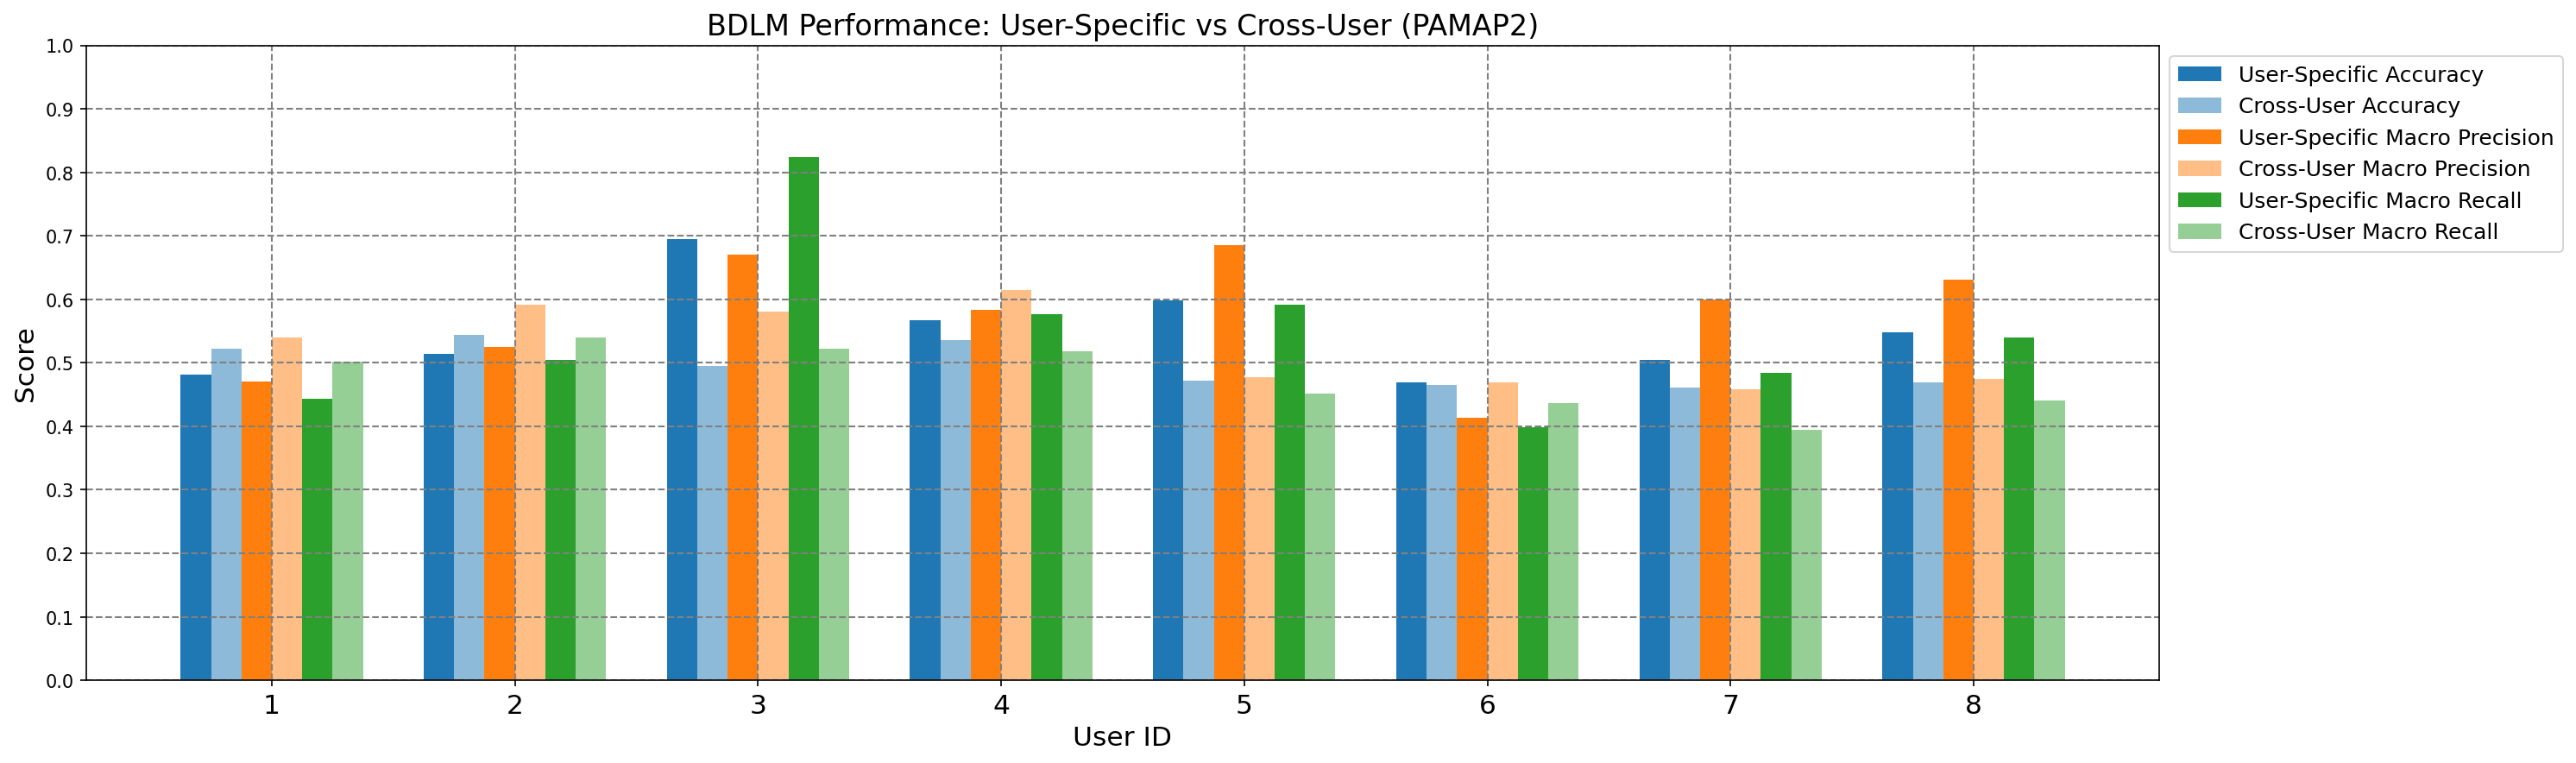

In [31]:
def return_combined_single_plot(df1, df2):
    # Set up the figure
    plt.figure(figsize=(20, 6), dpi=150)
    bar_width = 0.15  # Narrower bar width to fit both plots side by side
    index = 1.2*np.arange(len(df1['Subject']))  # Assuming both df1 and df2 have the same subjects
    
    # Friendly color palette
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

    # Adjusted plot positions for clarity and to match the request
    # Plot user-specific and cross-user accuracies side by side
    plt.bar(index - 1.5*bar_width, df1['Accuracy'], bar_width, label='User-Specific Accuracy', color=colors[0])
    plt.bar(index - 0.5*bar_width, df2['Accuracy'], bar_width, label='Cross-User Accuracy', color=colors[0], alpha=0.5)
    
    # Plot macro precision and recall for user-specific metrics
    plt.bar(index + 0.5*bar_width, df1['Macro Precision'], bar_width, label='User-Specific Macro Precision', color=colors[1])
    plt.bar(index + 1.5*bar_width, df2['Macro Precision'], bar_width, label='Cross-User Macro Precision', color=colors[1], alpha=0.5)
       
    # Plot macro precision and recall for cross-user metrics with an offset to align with their respective accuracy
    plt.bar(index + 2.5*bar_width, df1['Macro Recall'], bar_width, label='User-Specific Macro Recall', color=colors[2])
    plt.bar(index + 3.5*bar_width, df2['Macro Recall'], bar_width, label='Cross-User Macro Recall', color=colors[2], alpha=0.5)
    
    # Adding x-ticks, modified to center under the group of bars
    plt.xticks(index + bar_width, ids, fontsize=15)  # Assuming 'Subject' is a common column in both DataFrames
    
    
    plt.yticks([0.1*i for i in range(11)])

    # Labels and titles
    plt.title('BDLM Performance: User-Specific vs Cross-User (PAMAP2)', fontsize=16)
    plt.xlabel('User ID', fontsize=15)
    plt.ylabel('Score', fontsize=15)

        # Grid and legend
    plt.grid(True, which='major', linestyle='--', linewidth='1', color='grey')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

    # Show the plot
    plt.tight_layout()
    #plt.savefig("USC_metrics.png")
    plt.show()

# Assuming df1 and df2 are your DataFrames for user-specific and cross-user respectively

return_combined_single_plot(df_user_specific, df_cross_user)